Data : https://data.edd.ca.gov/Industry-Information-/Current-Employment-Statistics-CES-/r4zm-kdcg

In [1]:
from utils import common_utils
import ipywidgets as widgets

In [2]:
#import utils.common_utils

In [3]:
import os
os.listdir('./utils/')

['__init__.py', 'common_utils.py', '__pycache__', '.ipynb_checkpoints']

In [4]:
df_em = common_utils.load_and_describe_data('./Current_Employment_Statistics__CES_.csv')

********** info **********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428738 entries, 0 to 1428737
Data columns (total 9 columns):
area type              1428738 non-null object
area name              1428738 non-null object
year                   1428738 non-null int64
month                  1428738 non-null object
date                   1428738 non-null object
series code            1428738 non-null int64
industry title         1428738 non-null object
seasonally adjusted    1428738 non-null object
current employment     1428738 non-null int64
dtypes: int64(3), object(6)
memory usage: 98.1+ MB
None
********** columns **********
Index(['area type', 'area name', 'year', 'month', 'date', 'series code',
       'industry title', 'seasonally adjusted', 'current employment'],
      dtype='object')
********** number of duplicated rows **********
0
********** number of nulls in columns **********
area type              0
area name              0
year                   0
month          

In [5]:
common_utils.check_for_constant_columns(df_em)

[]

In [6]:
common_utils.view_column_value_counts(df_em)

Dropdown(description='Columns', index=1, options=('area type', 'area name', 'year', 'month', 'date', 'series c…

California                                           111864
Los Angeles-Long Beach-Glendale MD                    63720
Los Angeles County                                    63720
Orange County                                         35754
Anaheim-Santa Ana-Irvine MD                           35754
San Diego County                                      35514
San Diego-Carlsbad MSA                                35514
Riverside-San Bernardino-Ontario MSA                  33120
San Francisco-Redwood City-South San Francisco MD     31506
Oakland-Hayward-Berkeley MD                           30798
San Jose-Sunnyvale-Santa Clara MSA                    29142
Sacramento--Roseville--Arden-Arcade MSA               29028
Fresno MSA                                            19824
Fresno County                                         19824
Kern County                                           19584
Bakersfield MSA                                       19584
Oxnard-Thousand Oaks-Ventura MSA        

In [31]:
common_utils.check_cardinality_of_data(df_em)

Cardinality of data
area type : 3
area name : 88
year : 30
month : 12
date : 354
series code : 289
industry title : 288
seasonally adjusted : 2
current employment : 25753


In [50]:
#_=df_em['current employment'].plot(kind='box', logy=True)

In [49]:
#_=df_em[['year', 'current employment']].pivot(columns='year',values='current employment').plot(kind='box', logy=True)

In [58]:
years = df_em['year'].unique()
#months = df_em['month'].unique()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']
area_types = df_em['area type'].unique()
industry_titles = df_em['industry title'].unique()

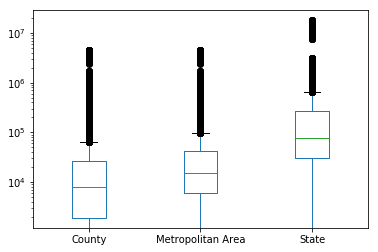

In [55]:
_=df_em.pivot(columns='area type',values='current employment').plot(kind='box', logy=True)

In [62]:
@widgets.interact_manual(industry_title=industry_titles, area_type=area_types)
def filter_by_year_month(industry_title=industry_titles[0], area_type=area_types[0]):
    data=df_em.loc[(df_em['industry title']==industry_title) & (df_em['area type']==area_type)]
    #print(data)
    if len(data) > 0:
        data['current employment'].plot(kind='box')

interactive(children=(Dropdown(description='industry_title', options=('Total Nonfarm', 'Total Wage and Salary'…

In [70]:
@widgets.interact_manual(year=years, industry_title=industry_titles, area_type=area_types)
def filter_by_year_month(industry_title=industry_titles[0], area_type=area_types[0]):
    data=df_em.loc[(df_em['industry title']==industry_title) & (df_em['area type']==area_type)]
    #print(data)
    print(industry_title)
    if len(data) > 0:
        data[['current employment', 'year']].pivot(columns='year', values='current employment').plot(kind='box',figsize=(16,10))

interactive(children=(Dropdown(description='industry_title', options=('Total Nonfarm', 'Total Wage and Salary'…

In [78]:
@widgets.interact_manual(year=years, industry_title=industry_titles, area_type=area_types)
def filter_by_year_month(industry_title=industry_titles[0], area_type=area_types[0]):
    data=df_em.loc[(df_em['industry title']==industry_title) & (df_em['area type']==area_type)]
    #print(data)
    print(industry_title)
    if len(data) > 0:
        data_pivot = data[['current employment', 'month']].pivot(columns='month', values='current employment')
        data_pivot = data_pivot[months]
        data_pivot.plot(kind='box',figsize=(16,10))

interactive(children=(Dropdown(description='industry_title', options=('Total Nonfarm', 'Total Wage and Salary'…

In [52]:
@widgets.interact_manual(year=years, month=months, area_type=area_types)
def filter_by_year_month(year=years[0], month=months[0], area_type=area_types[0]):
    data=df_em.loc[(df_em['year']==year) & (df_em['month']==month) & (df_em['area type']==area_type)]
    #print(data)
    data['current employment'].plot(kind='box', logy=True)

interactive(children=(Dropdown(description='year', options=(2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 20…